# Solar system simulation for one million years
N-body simulations can help us understanding the evolution of our solar system.
Let's try to simulate it with different algorithms and visualize its secular evolution.

If your system can't run or render this notebook, you could view it on github.

## Import libraries

In [1]:
import numpy as np
from grav_sim import GravitySimulatorAPI

gs = GravitySimulatorAPI()

print()
print("Available built-in systems:", gs.BUILT_IN_SYSTEMS)
print("Available acceleration methods:", gs.AVAILABLE_ACCELERATION_METHODS)
print("Available integrators:", gs.AVAILABLE_INTEGRATORS)
print("Fixed step size integrators:", gs.FIXED_STEP_SIZE_INTEGRATORS)
print("Adaptive step size integrators:", gs.ADAPTIVE_STEP_SIZE_INTEGRATORS)
print("Available output methods:", gs.AVAILABLE_OUTPUT_METHODS)
print("Available output data types:", gs.AVAILABLE_OUTPUT_DTYPE)

colors = [
    "orange",
    "slategrey",
    "wheat",
    "skyblue",
    "red",
    "darkgoldenrod",
    "gold",
    "paleturquoise",
    "blue",   
]
labels = [
    "Sun",
    "Mercury",
    "Venus",
    "Earth",
    "Mars",
    "Jupiter",
    "Saturn",
    "Uranus",
    "Neptune",
]


Available built-in systems: ['circular_binary_orbit', 'eccentric_binary_orbit', '3d_helix', 'sun_earth_moon', 'figure-8', 'pyth-3-body', 'solar_system', 'solar_system_plus']
Available acceleration methods: ['pairwise', 'massless', 'barnes_hut', 'particle_mesh']
Available integrators: ['euler', 'euler_cromer', 'rk4', 'leapfrog', 'rkf45', 'dopri', 'dverk', 'rkf78', 'ias15', 'whfast']
Fixed step size integrators: ['euler', 'euler_cromer', 'rk4', 'leapfrog', 'whfast']
Adaptive step size integrators: ['rkf45', 'dopri', 'dverk', 'rkf78', 'ias15']
Available output methods: ['disabled', 'csv', 'hdf5']
Available output data types: ['float', 'double']


## WHFast
We will start with the WHFast algorithm. This algorithm is symplectic (conserves energy over long simulation period). It is suitable for stable systems like our solar system.

We start with $\text{d}t = 5.0 \text{ days}$. For most computers, it should only take a few minutes.

In [2]:
system = gs.get_built_in_system("solar_system")

### Parameters ###
tf = gs.years_to_days(1000000.0)  # One million years

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "whfast"
integrator_param.dt = 5.0

output_param.method = "csv"
output_param.output_interval = tf / 1000.0

In [3]:
gs.launch_simulation(system, acc_param, integrator_param, output_param, settings, tf)

-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.3

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: true
    Version: 1.14.6
  Compiled with FFTW3: false

Build time: Apr 12 2025 00:34:13
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 3.65242e+08

System:
  Number of particles: 9
  Gravitati

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/grav_sim/examples/tmp/".


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 00:01:47 • 00:00:00━━━━━━━━━━━━━━━━━━━  14% • 00:00:15 • 00:01:26


### Data analysis
Let's plot the relative energy error. We can see that the error is bounded within $5 \times 10^{-8}$ even over 1 million years!

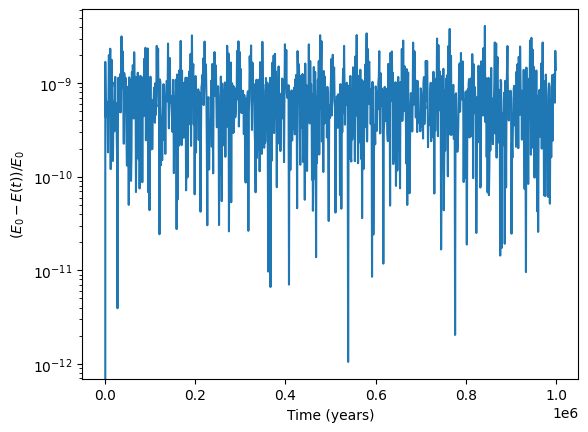

In [4]:
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)

sol_energy = gs.compute_energy(sol_state, G)
gs.plot_rel_energy_error(
    sol_energy=sol_energy,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

### Secular evolution
We can visualize the secular evolution of the solar system over 1 million years by plotting their eccentricity and inclination.

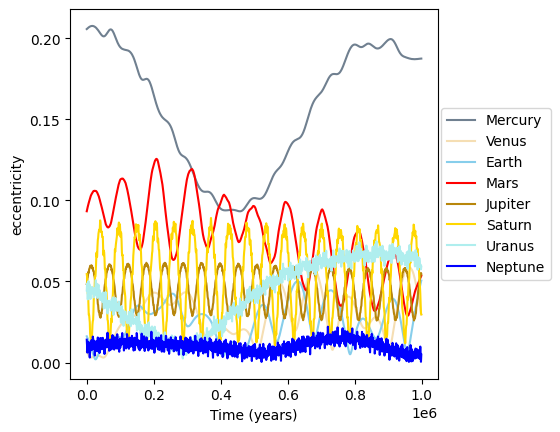

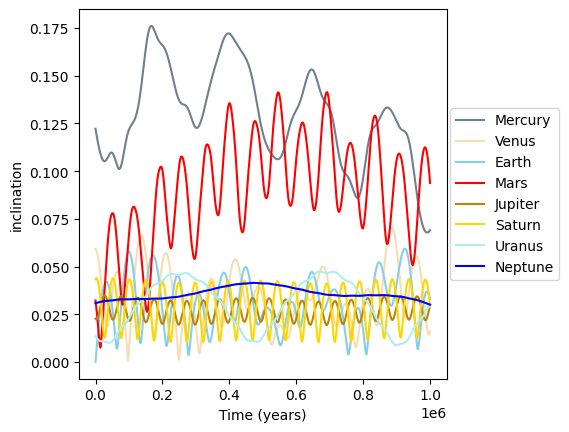

In [5]:
eccentricity = gs.compute_eccentricity(G, sol_state)
gs.plot_quantity_against_time(
    quantity=eccentricity,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="eccentricity",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

inclination = gs.compute_inclination(sol_state)
gs.plot_quantity_against_time(
    quantity=inclination,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="inclination",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

In [6]:
gs.delete_snapshots(output_dir=output_param.output_dir)

del system
del acc_param
del integrator_param
del output_param
del settings

## Comparison between algorithms
Now, we can compare WHFast with other algorithms.

## IAS15
IAS15 is a high order integrator with extreme accuracy. However, running this may take 2 hours - 10 hours, depending on your computer.

In [7]:
system = gs.get_built_in_system("solar_system")

### Parameters ###
tf = gs.years_to_days(1000000.0)  # One million years

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "ias15"
integrator_param.tolerance = 1e-9

output_param.method = "csv"
output_param.output_interval = tf / 1000.0

In [8]:
gs.launch_simulation(system, acc_param, integrator_param, output_param, settings, tf)

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/grav_sim/examples/tmp/".


-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.3

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: true
    Version: 1.14.6
  Compiled with FFTW3: false

Build time: Apr 12 2025 00:34:13
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 3.65242e+08

System:
  Number of particles: 9
  Gravitati

### Data analysis
Here, the energy error is not bounded like WHFast, but it is growing very slowly! After 1 million years, the error remains in the order of $10^{-14}$. This is due to the accuracy of IAS15 and the reduction of round-off error by using compensated summation.

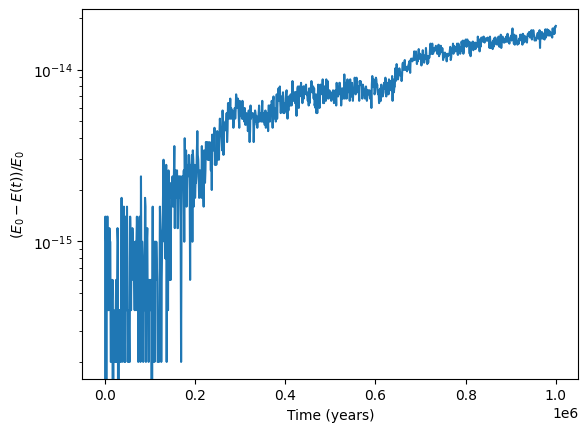

In [9]:
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)

sol_energy = gs.compute_energy(sol_state, G)
gs.plot_rel_energy_error(
    sol_energy=sol_energy,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

### Secular evolution
Comparing the secular evolution with WHFast, we can see that they agree extremely well with each other.

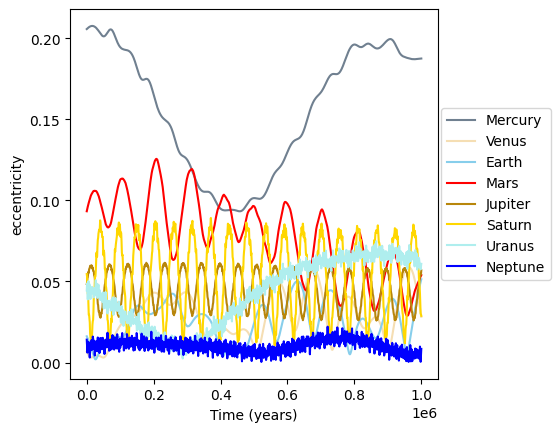

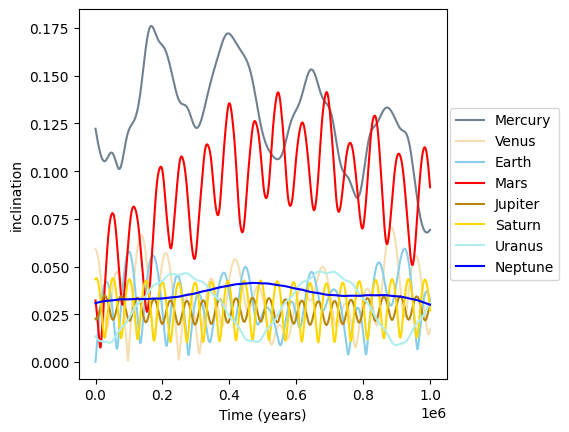

In [10]:
eccentricity = gs.compute_eccentricity(G, sol_state)
gs.plot_quantity_against_time(
    quantity=eccentricity,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="eccentricity",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

inclination = gs.compute_inclination(sol_state)
gs.plot_quantity_against_time(
    quantity=inclination,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="inclination",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

In [11]:
gs.delete_snapshots(output_dir=output_param.output_dir)

del system
del acc_param
del integrator_param
del output_param
del settings

## LeapFrog
LeapFrog is a second order symplectic method that conserves energy and is very simple to implement.
Let us try $\text{d}t = 0.5 \text{ days}$. The run time should be very close to WHFast with $\text{d}t = 5.0 \text{ days}$.

In [12]:
system = gs.get_built_in_system("solar_system")

### Parameters ###
tf = gs.years_to_days(1000000.0)  # One million years

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "leapfrog"
integrator_param.dt = 0.5

output_param.method = "csv"
output_param.output_interval = tf / 1000.0

In [13]:
gs.launch_simulation(system, acc_param, integrator_param, output_param, settings, tf)

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/grav_sim/examples/tmp/".


-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.3

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: true
    Version: 1.14.6
  Compiled with FFTW3: false

Build time: Apr 12 2025 00:34:13
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 3.65242e+08

System:
  Number of particles: 9
  Gravitati

### Data analysis
Again, we can see the relative energy error is bounded! However, for the secular evolution, we can see that the eccentricity does not agree very well with IAS15 and WHFast. Inclination, on the other hand, agrees relatively well except for Mercury.

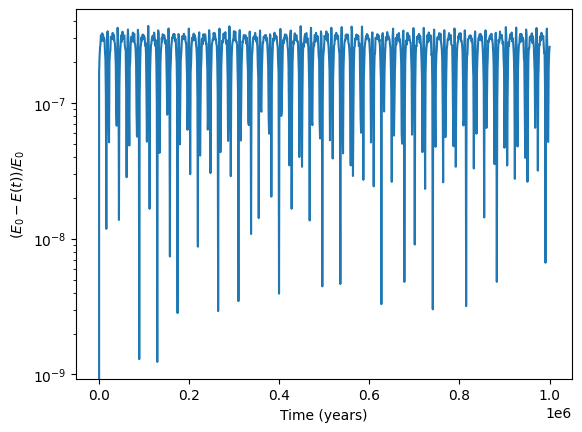

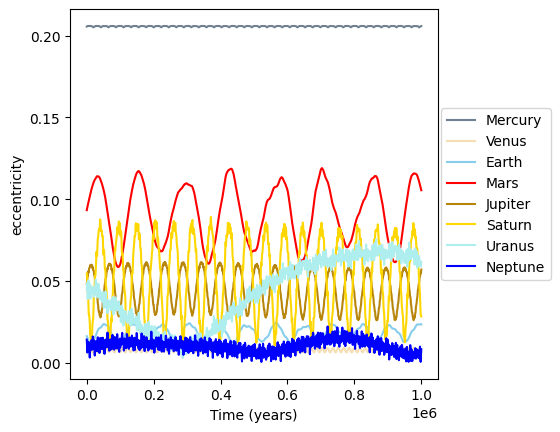

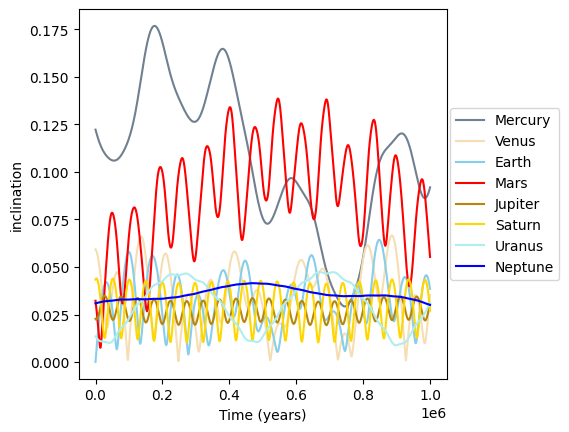

In [14]:
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)

sol_energy = gs.compute_energy(sol_state, G)
gs.plot_rel_energy_error(
    sol_energy=sol_energy,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

eccentricity = gs.compute_eccentricity(G, sol_state)
gs.plot_quantity_against_time(
    quantity=eccentricity,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="eccentricity",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

inclination = gs.compute_inclination(sol_state)
gs.plot_quantity_against_time(
    quantity=inclination,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="inclination",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

In [15]:
gs.delete_snapshots(output_dir=output_param.output_dir)

del system
del acc_param
del integrator_param
del output_param
del settings

Let's try a smaller $\text{d}t = 0.1 \text{ days}$ and see if the result improves.

In [16]:
system = gs.get_built_in_system("solar_system")

### Parameters ###
tf = gs.years_to_days(1000000.0)  # One million years

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "leapfrog"
integrator_param.dt = 0.1

output_param.method = "csv"
output_param.output_interval = tf / 1000.0

In [17]:
gs.launch_simulation(system, acc_param, integrator_param, output_param, settings, tf)

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/grav_sim/examples/tmp/".


-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.3

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: true
    Version: 1.14.6
  Compiled with FFTW3: false

Build time: Apr 12 2025 00:34:13
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 3.65242e+08

System:
  Number of particles: 9
  Gravitati

### Data Analysis
Unfortunately, the round-off error starts to build up as we used a very small $\text{d}t$. The energy error is no longer bounded and the secular evolution became unstable for all planets.

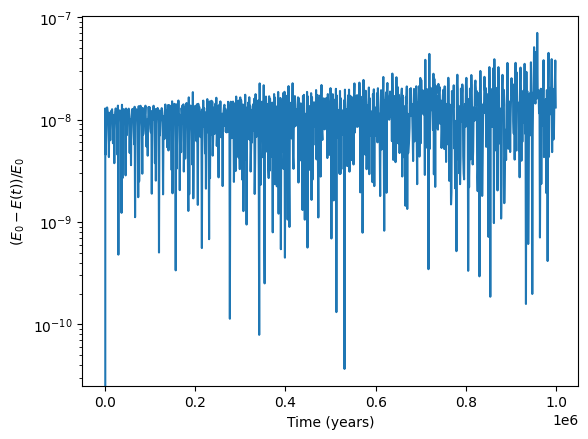

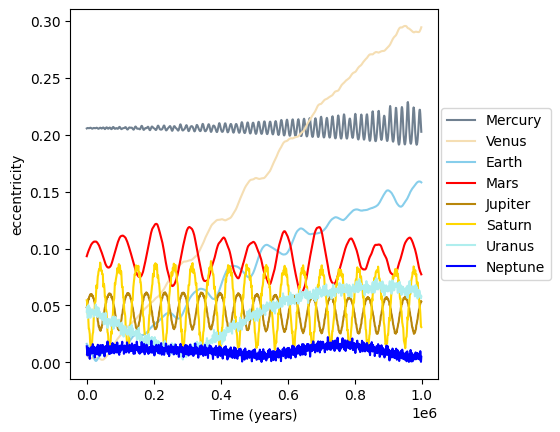

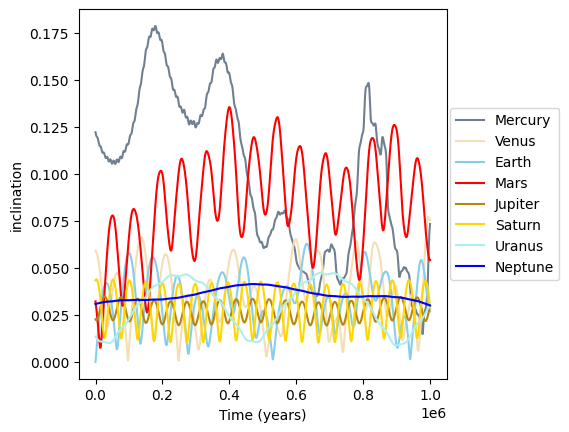

In [18]:
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)

sol_energy = gs.compute_energy(sol_state, G)
gs.plot_rel_energy_error(
    sol_energy=sol_energy,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

eccentricity = gs.compute_eccentricity(G, sol_state)
gs.plot_quantity_against_time(
    quantity=eccentricity,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="eccentricity",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

inclination = gs.compute_inclination(sol_state)
gs.plot_quantity_against_time(
    quantity=inclination,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="inclination",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

In [19]:
gs.delete_snapshots(output_dir=output_param.output_dir)

del system
del acc_param
del integrator_param
del output_param
del settings

## RK4
RK4 is another popular n-body algorithm, which has a good balance on computational cost and accuracy. Since it does not conserve energy, it is not suitable for long term simulations. 

We will use $\text{d}t = 0.5 \text{ days}$.

In [20]:
system = gs.get_built_in_system("solar_system")

### Parameters ###
tf = gs.years_to_days(1000000.0)  # One million years

acc_param, integrator_param, output_param, settings = gs.get_new_parameters()
integrator_param.integrator = "rk4"
integrator_param.dt = 0.5

output_param.method = "csv"
output_param.output_interval = tf / 1000.0

In [21]:
gs.launch_simulation(system, acc_param, integrator_param, output_param, settings, tf)

    Directory for storing snapshots already exists. The files will be overwritten. Directory: "/Users/alvinng/Desktop/cuhk/gravity-simulator/Final Project/grav_sim/examples/tmp/".


-----------------------------------------------------------------
                                              __                   
    __   _ __    __     __  __           ____/\_\    ___ ___       
  /'_ `\/\`'__\/'__`\  /\ \/\ \         /',__\/\ \ /' __` __`\     
 /\ \L\ \ \ \//\ \L\.\_\ \ \_/ |       /\__, `\ \ \/\ \/\ \/\ \    
 \ \____ \ \_\\ \__/.\_\\ \___/        \/\____/\ \_\ \_\ \_\ \_\   
  \/___L\ \/_/ \/__/\/_/ \/__/   _______\/___/  \/_/\/_/\/_/\/_/   
    /\____/                     /\______\                          
    \_/__/                      \/______/                          


grav_sim version 0.0.3

Operating System: MacOS
Compilation Info:
  Compiled with OpenMP: false
  Compiled with HDF5: true
    Version: 1.14.6
  Compiled with FFTW3: false

Build time: Apr 12 2025 00:34:13
Compiler: Clang (version: 15)
-----------------------------------------------------------------
Simulation parameters:
  tf: 3.65242e+08

System:
  Number of particles: 9
  Gravitati

### Data analysis
We can see that the energy error goes up to $10^{-4}$, which is not ideal. Nevertheless, looking at the secular evolution, we can see that it performed a lot better than LeapFrog.

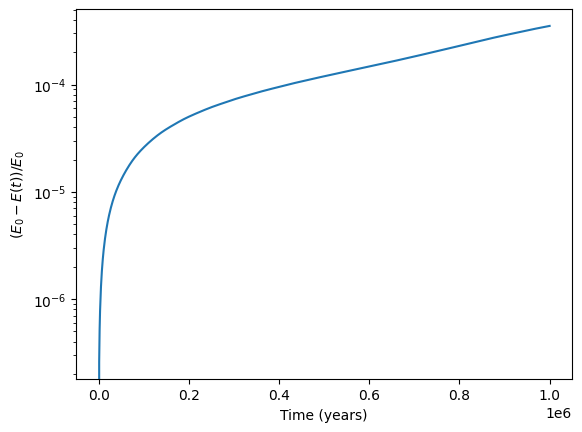

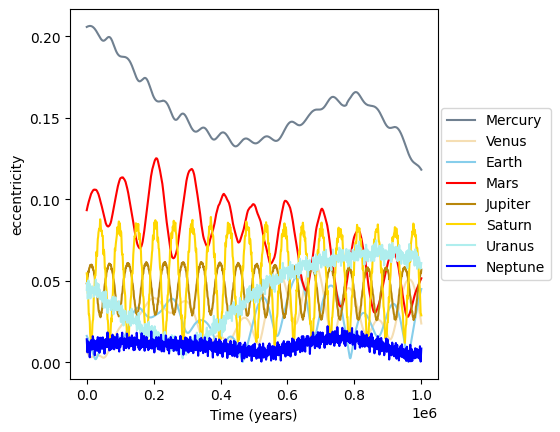

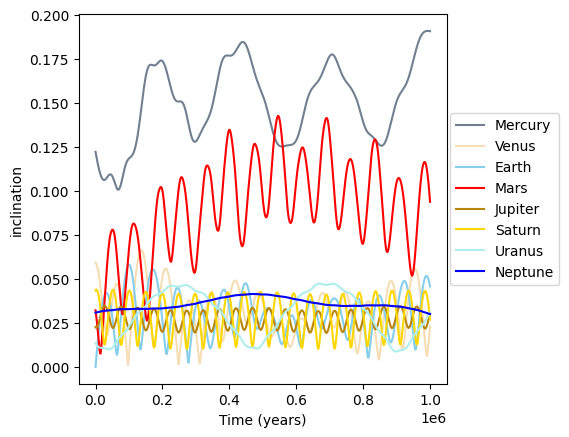

In [22]:
G, sol_time, sol_dt, sol_particle_ids, sol_state = gs.read_csv_data(
    output_param.output_dir
)

sol_energy = gs.compute_energy(sol_state, G)
gs.plot_rel_energy_error(
    sol_energy=sol_energy,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
)

eccentricity = gs.compute_eccentricity(G, sol_state)
gs.plot_quantity_against_time(
    quantity=eccentricity,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="eccentricity",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

inclination = gs.compute_inclination(sol_state)
gs.plot_quantity_against_time(
    quantity=inclination,
    is_log_y=False,
    sol_time=gs.days_to_years(sol_time),
    xlabel="Time (years)",
    ylabel="inclination",
    colors=colors[1:],  # Exclude the Sun
    labels=labels[1:],  # Exclude the Sun
    legend=True,
)

In [ ]:
gs.delete_snapshots(output_dir=output_param.output_dir)

del system
del acc_param
del integrator_param
del output_param
del settings

# END